In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import os

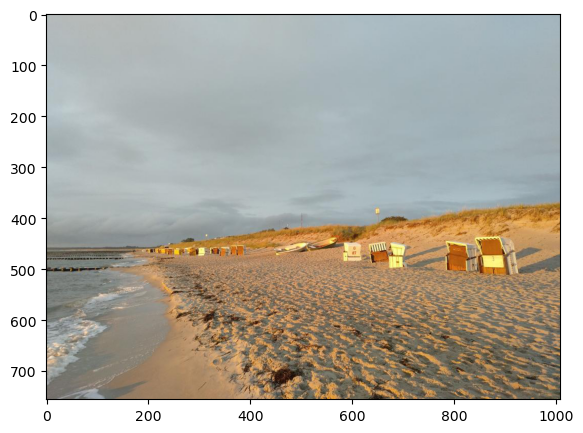

In [2]:
img = cv2.imread('source\\sea.jpg')
#C:\Users\mykhailo.zaika\Documents\PythonProjects\CV_lessons\CV_lessons_Homeworks\Lesson2\source
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

coeffs R:{1.011905} G:{1.053719} B:{2.007874}


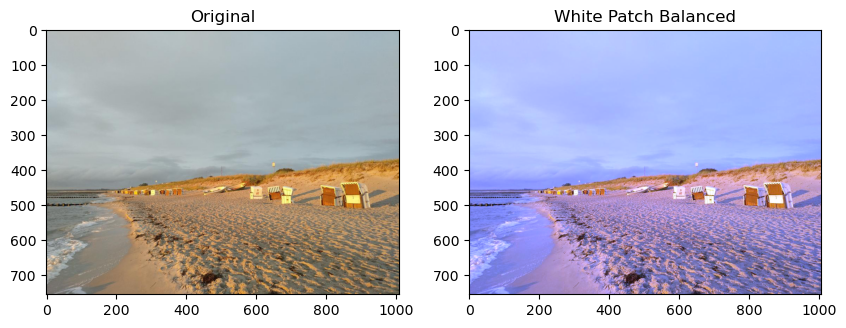

In [3]:
# ==============================
# White patch
# Define white patch and the coefficients
row, col = 485, 864
white = img[row, col, :]
coeffs = 255 / white
print("coeffs R:{%f} G:{%f} B:{%f}" % (coeffs[0], coeffs[1],  coeffs[2]))

# Apply the coefficients to each channel
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[:, :, channel] = img[:, :, channel] * coeffs[channel]

#White patching does not guarantee that the values will be in [0, 255], image must be clipped
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(balanced), plt.title('White Patch Balanced')
plt.show()

mean_r = 103.38559133788306 mean_g = 88.00661899540617 mean_b = 65.54022676144204
kr = 0.8283953749255347 kg = 0.973155731646892 kb = 1.3067416750017875


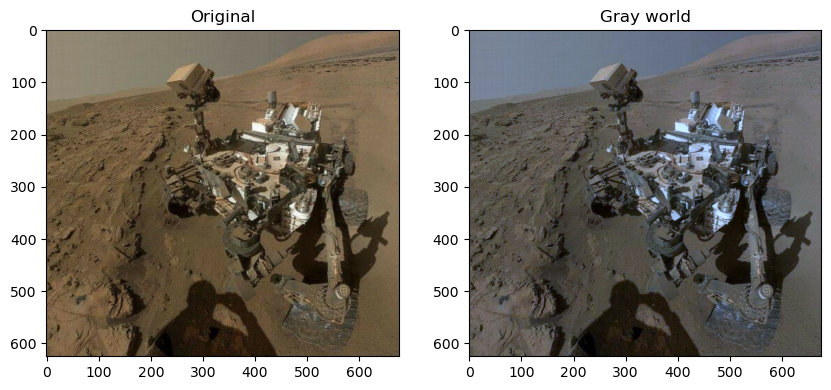

In [4]:
# ==============================
# Gray world
img = cv2.imread('C:\\Users\\mykhailo.zaika\\Documents\\PythonProjects\\CV_lessons\\CV_lessons_Homeworks\\Lesson2\\source\\marsian_rover.png')
#plt.rcParams['figure.figsize'] = [6.52 , 7.04]

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Усереднення по кожному каналу
mean_r = np.mean(img[:, :, 0])
mean_g = np.mean(img[:, :, 1])
mean_b = np.mean(img[:, :, 2])

# Середнє арифметичне значення
mean_avg = (mean_r + mean_g + mean_b) / 3

# Коефіцієнти
kr = mean_avg / mean_r
kg = mean_avg / mean_g
kb = mean_avg / mean_b

print("mean_r =", mean_r, "mean_g =", mean_g, "mean_b =", mean_b)
print("kr =", kr, "kg =", kg, "kb =", kb)

# Застосування коефіцієнтів
balanced = img.astype(np.float32).copy()
# По кожному каналу окремо - трішечки повільніше
#balanced[:, :, 0] *= kr
#balanced[:, :, 1] *= kg
#balanced[:, :, 2] *= kb

coeffs = np.array([kr, kg, kb])        
# Vectorized operation - швидше (проходить по масиву лише один раз)
balanced = img.astype(np.float32) * coeffs

# Обрізаємо значення до [0, 255]
balanced = np.clip(balanced, 0, 255).astype(np.uint8)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(balanced), plt.title('Gray world')
plt.show()

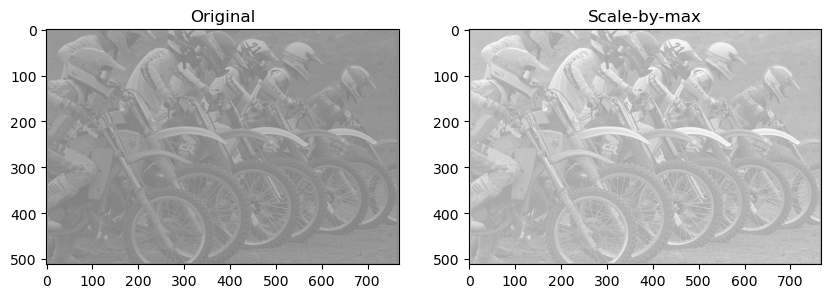

In [5]:
# ==============================
# Scale-by-max

img = cv2.imread('C:\\Users\\mykhailo.zaika\\Documents\\PythonProjects\\CV_lessons\\CV_lessons_Homeworks\\Lesson2\\source\\kodim05.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# макисмуми по кожному каналу
max_r = np.max(img[:, :, 0])
max_g = np.max(img[:, :, 1])
max_b = np.max(img[:, :, 2])

# коефіцієнти
kr = 255 / max_r
kg = 255 / max_g
kb = 255 / max_b

# застосування коефіцієнтів
balanced = img.astype(np.float32).copy()
coeffs = np.array([kr, kg, kb])        
balanced = img.astype(np.float32) * coeffs

# Обрізаємо значення до [0, 255]
balanced = np.clip(balanced, 0, 255).astype(np.uint8)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(balanced), plt.title('Scale-by-max')
plt.show()
